In [1]:
from tensorflow.python.keras import backend as k 

from tensorflow.python.keras.preprocessing.image import load_img,ImageDataGenerator,img_to_array
from tensorflow.python.keras.models import Sequential

from tensorflow.python.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from tensorflow.python.keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.python.keras.optimizers import Adam, SGD, RMSprop

import tensorflow as tf

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset=r'D:/DEEP LEARNING/CORONA VIRUS/dataset'

In [3]:
category=os.listdir(dataset)
category

['covid', 'normal']

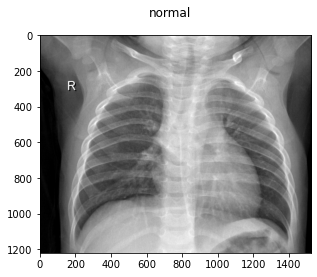

In [4]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

normal_images = []
for img_path in glob.glob(dataset + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('normal')
plt.imshow(normal_images[0], cmap='gray') 



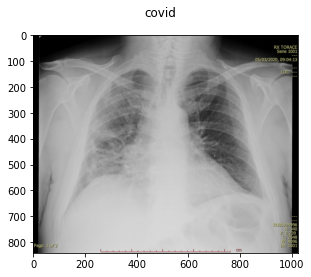

In [9]:
import cv2
covid_images = []
for img_path in glob.glob(dataset + '/covid/*'):
    #print(img_path)
    covid_images.append(cv2.imread(img_path))

fig = plt.figure()
fig.suptitle('covid')
plt.imshow(covid_images[0], cmap='gray') 

In [7]:
print(len(covid_images))
print(len(normal_images))

70
28


In [14]:
covid_images[1].shape

(708, 629, 3)

In [13]:
normal_images[2].shape

(1367, 1944)

In [18]:
img_width=150
img_height=150
channels=3



In [33]:
input_shapes=(img_width,img_height,channels)
classes=2
Epochs=50
batch_size=6


In [22]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_shapes))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))


model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [30]:
from tensorflow import keras
keras.optimizers.Adam

tensorflow.python.keras.optimizers.Adam

In [31]:

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [36]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)

train_generator = train_datagen.flow_from_directory(
    dataset,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    dataset, 
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle= False,
    subset='validation')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = Epochs)

Found 69 images belonging to 2 classes.
Found 29 images belonging to 2 classes.
Epoch 1/50
11/11 [==============================] - 17s 2s/step - loss: 0.6393 - acc: 0.6667 - val_loss: 0.4518 - val_acc: 0.8750
Epoch 2/50
11/11 [==============================] - 7s 671ms/step - loss: 0.6185 - acc: 0.7414 - val_loss: 0.3866 - val_acc: 0.8750
Epoch 3/50
11/11 [==============================] - 7s 679ms/step - loss: 0.6151 - acc: 0.7121 - val_loss: 0.5835 - val_acc: 0.8750
Epoch 4/50
11/11 [==============================] - 7s 649ms/step - loss: 0.6450 - acc: 0.6653 - val_loss: 0.4519 - val_acc: 0.8750
Epoch 5/50
11/11 [==============================] - 8s 685ms/step - loss: 0.6282 - acc: 0.7149 - val_loss: 0.4518 - val_acc: 0.9167
Epoch 6/50
11/11 [==============================] - 7s 660ms/step - loss: 0.4137 - acc: 0.8939 - val_loss: 0.5109 - val_acc: 0.8750
Epoch 7/50
11/11 [==============================] - 7s 633ms/step - loss: 0.4799 - acc: 0.8340 - val_loss: 0.2396 - val_acc: 0.958

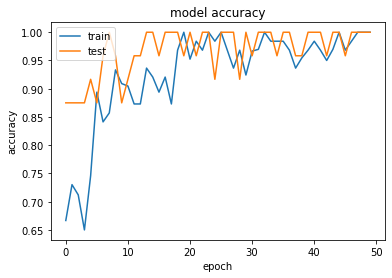

In [40]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


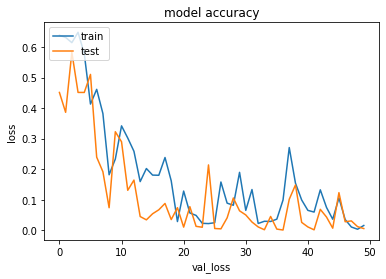

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('val_loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [68]:
print("training_accuracy", history.history['acc'][-1])
print("validation_accuracy", history.history['val_acc'][-1])

training_accuracy 1.0
validation_accuracy 1.0


In [72]:
label = validation_generator.classes

In [83]:
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
labels

{'covid': 0, 'normal': 1}

In [80]:
from tensorflow.python.keras.preprocessing import image
img=cv2.resize(covid_images[0],(150,150))
img_pred=image.img_to_array(img)
img_pred=np.expand_dims(img_pred,axis=0)

In [81]:
model.predict(img_pred)

array([[0.]], dtype=float32)

Reference website - Kaggle 
Refernece link  -  https://www.kaggle.com/eswarchandt/covid-19-detection-from-lung-x-rays/data